    Project Name: Swing Trading Trend Correlative Predictor (Dimensionality Reduction Machine Learning)
    Project Task: SPY Historical Primary Dataset Merging
    Project Subject: SPY (SPDR S&P 500 ETF)
    Author: Melvin Tai (last updated: September 1st, 2025)

In [275]:
# Importing respective libraries.
import polars as pl
import datetime as dt
import matplotlib.pyplot as plt

In [277]:
# Reading respective files.
df_1 = pl.read_csv("SPY_Daily_Stock_Info_(Jan1993-Dec2023)_(SPY_Regression.csv)_SciCapt_Kaggle_29Jan1993_27Dec2023.csv")
df_2 = pl.read_csv("SPY_Stock_Prices_(stockData.csv)_Kenneth_Conner_Kaggle_28Dec2023_20Dec2024.csv")
df_3 = pl.read_csv("SPDR_S&P_500_(SPY)_Historical_Nasdaq_23Dec2024_31Aug2025.csv")

# Printing respective files.
print("SPY_Daily_Stock_Info_(Jan1993-Dec2023)_(SPY_Regression.csv)_SciCapt_Kaggle_29Jan1993_27Dec2023.csv,", df_1, "\n")
print("SPY_Stock_Prices_(stockData.csv)_Kenneth_Conner_Kaggle_28Dec2023_20Dec2024.csv,", df_2, "\n")
print("SPDR_S&P_500_(SPY)_Historical_Nasdaq_23Dec2024_31Aug2025.csv,", df_3)

SPY_Daily_Stock_Info_(Jan1993-Dec2023)_(SPY_Regression.csv)_SciCapt_Kaggle_29Jan1993_27Dec2023.csv, shape: (7_784, 9)
┌────────────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────────┐
│ Date       ┆ Open       ┆ High       ┆ Low        ┆ … ┆ Adj Close  ┆ Volume    ┆ Dividends ┆ NextDayChange │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---           │
│ str        ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ i64       ┆ f64       ┆ f64           │
╞════════════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════════╡
│ 1/29/1993  ┆ 43.96875   ┆ 43.96875   ┆ 43.75      ┆ … ┆ 24.840687  ┆ 1003200   ┆ 0.0       ┆ 0.28125       │
│ 2/1/1993   ┆ 43.96875   ┆ 44.25      ┆ 43.96875   ┆ … ┆ 25.017357  ┆ 480500    ┆ 0.0       ┆ 0.125         │
│ 2/2/1993   ┆ 44.21875   ┆ 44.375     ┆ 44.125     ┆ … ┆ 25.070366  ┆ 201300    ┆ 0.0       ┆ 0.40625   

In [279]:
# Preparing Dataset 1.
df_1 = df_1["Date", "Open", "High", "Low", "Close", "Volume"]
df_1 = df_1.with_columns(pl.col("Date").str.strptime(pl.Date, "%m/%d/%Y"))
df_1

Date,Open,High,Low,Close,Volume
date,f64,f64,f64,f64,i64
1993-01-29,43.96875,43.96875,43.75,43.9375,1003200
1993-02-01,43.96875,44.25,43.96875,44.25,480500
1993-02-02,44.21875,44.375,44.125,44.34375,201300
1993-02-03,44.40625,44.84375,44.375,44.8125,529400
1993-02-04,44.96875,45.09375,44.46875,45.0,531500
…,…,…,…,…,…
2023-12-20,473.959992,475.899994,467.820007,468.26001,102921000
2023-12-21,471.329987,472.980011,468.839996,472.700012,86667500
2023-12-22,473.859985,475.380005,471.700012,473.649994,67126600


In [281]:
# Preparing Dataset 2.
df_2 = df_2["timestamp", "open", "high", "low", "close", "volume"].rename({
    df_2.columns[0]: "Date",
    df_2.columns[1]: "Open",
    df_2.columns[2]: "High",
    df_2.columns[3]: "Low",
    df_2.columns[4]: "Close",
    df_2.columns[5]: "Volume"})
df_2 = df_2.with_columns(pl.col("Date").str.strptime(pl.Date, "%m/%d/%Y"))
df_2 = df_2.filter(pl.col("Date") >= dt.date(2023, 12, 28)).reverse()
df_2

Date,Open,High,Low,Close,Volume
date,f64,f64,f64,f64,i64
2023-12-28,476.88,477.55,476.26,476.69,77158116
2023-12-29,476.49,477.03,473.3,475.31,122283149
2024-01-02,472.16,473.67,470.49,472.65,123007793
2024-01-03,470.43,471.19,468.17,468.79,103585866
2024-01-04,468.3,470.96,467.05,467.28,84232169
…,…,…,…,…,…
2024-12-16,606.0,607.7795,605.21,606.79,43695179
2024-12-17,604.19,605.17,602.885,604.29,55773545
2024-12-18,603.98,606.405,585.89,586.28,108248729


In [283]:
# Preparing Dataset 3.
df_3 = df_3.rename({df_3.columns[1]: "Close"})
df_3 = df_3.select(["Date", "Open", "High", "Low", "Close", "Volume"])
df_3 = df_3.with_columns(pl.col("Date").str.strptime(pl.Date, "%m/%d/%Y"))
df_3 = df_3.filter(pl.col("Date") >= dt.date(2024, 12, 23)).reverse()
df_3

Date,Open,High,Low,Close,Volume
date,f64,f64,f64,f64,i64
2024-12-23,590.89,595.3,587.661,594.69,57635830
2024-12-24,596.06,601.34,595.47,601.3,33160100
2024-12-26,599.5,602.48,598.0825,601.34,41338890
2024-12-27,597.54,597.7761,590.7647,595.01,64969310
2024-12-30,587.89,591.74,584.41,588.22,56578760
…,…,…,…,…,…
2025-08-25,644.04,645.29,642.35,642.47,51274330
2025-08-26,642.2,645.51,641.57,645.16,51581570
2025-08-27,644.57,647.37,644.42,646.63,48341070


In [285]:
# Concatenating all three datasets and saving it into "STTCP_Primary_Dataset.csv" file.
df = pl.concat([df_1, df_2, df_3])
df.write_csv("STTCP_Primary_Dataset.csv")
df

Date,Open,High,Low,Close,Volume
date,f64,f64,f64,f64,i64
1993-01-29,43.96875,43.96875,43.75,43.9375,1003200
1993-02-01,43.96875,44.25,43.96875,44.25,480500
1993-02-02,44.21875,44.375,44.125,44.34375,201300
1993-02-03,44.40625,44.84375,44.375,44.8125,529400
1993-02-04,44.96875,45.09375,44.46875,45.0,531500
…,…,…,…,…,…
2025-08-25,644.04,645.29,642.35,642.47,51274330
2025-08-26,642.2,645.51,641.57,645.16,51581570
2025-08-27,644.57,647.37,644.42,646.63,48341070


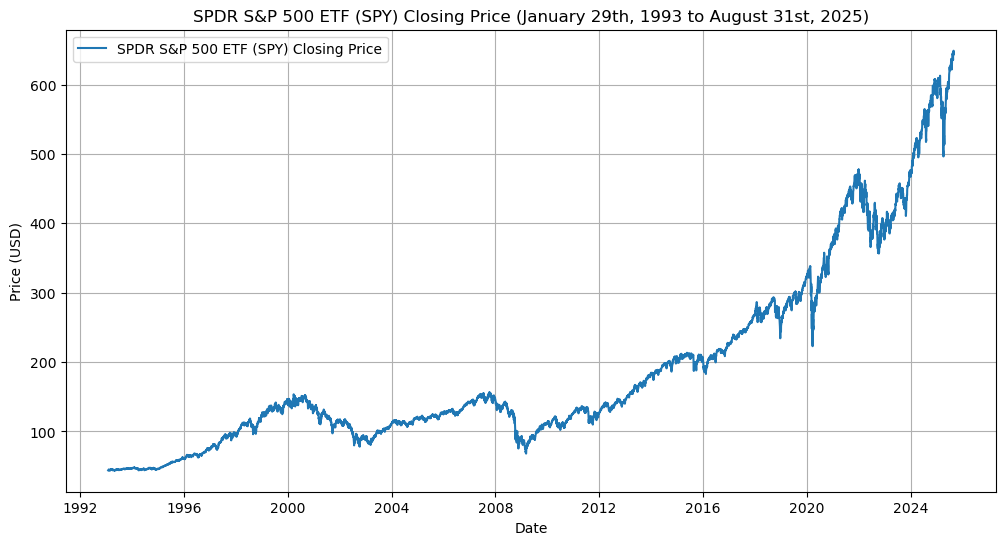

In [287]:
# Visualizing the concatenated dataset.
plt.figure(figsize = (12,6))
plt.plot(df["Date"], df["Close"], label = "SPDR S&P 500 ETF (SPY) Closing Price")
plt.title("SPDR S&P 500 ETF (SPY) Closing Price (January 29th, 1993 to August 31st, 2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#### Data Verified:  
    Google Finance. (n.d.). SPDR S&P 500 ETF Trust (spy) price & news. 
    https://www.google.com/finance/quote/SPY:NYSEARCA?sa=X&ved=2ahUKEwi8seev-rKPAxXh8DQHHXhtG40Q3ecFegQINxAb&window=MAX 
    
#### Used Datasets:  
    Conner, K. (2024, December 24). Spy Stock Prices. Kaggle. 
    https://www.kaggle.com/datasets/kennethconner/stock-prices?select=stockData.csv 
    
    Nasdaq. (n.d.). (SPY) Historical | Nasdaq. 
    https://www.nasdaq.com/market-activity/etf/spy/historical?page=18&rows_per_page=10&timeline=y1 
    
    SciCapt. (2023, December 28). Spy Daily Stock Info (01/1993 - 12/2023). Kaggle. 
    https://www.kaggle.com/datasets/seansaliga/spy-start-10312023?select=SPY%2BRegression.csv 